In [1]:
%matplotlib inline


# Model eigenvalues  

Eigenvalues are a fundamental concept in dynamic models. In simple terms, they summarize the adjustment process within a model. In the context of dynamic models, the sign and magnitude of the eigenvalues determine whether a system of equations will converge to a stable equilibrium, oscillate, or diverge. 

In the case of a macromodel, which is effectively a system of differential equations, the eigenvalues of the coefficient matrix determine whether the system is stable, marginally stable, or unstable. If all the eigenvalues have negative real parts, then the system is stable and will converge to a steady state over time. If at least one eigenvalue has a positive real part, then the system is unstable, and the solutions will diverge over time.


The modelflow library includes a range of methods to calculate the eigenvalues of a model, which can be used to help to assure that a model's dynamics will be stable and to identify sources of instability where they exist.

## Initialization of modelflow environment



In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np 

from modelclass import model 
from modelnewton import newton_diff

model.widescreen()


## Load a pre-existing model, data and descriptions 

For the purposes of this exposition the climate aware model forPakistan described {cite:author}`burns_climate_2021` is used.



In [4]:
mpak,baseline = model.modelload('../models/pak.pcim')
baseline = mpak(baseline,2023,2024)


Open file from URL:  https://raw.githubusercontent.com/IbHansen/modelflow-manual/main/model_repo/pak.pcim


```modelflow .netwondiff() method
```
```model derivatives
```
```eigenvalues
```
```modelflow eigenvalues
```
## the method .newton_diff()

The `modelflow` method `.newtondiff()` calculates the derivatives of the mpak model. 

The object mpak_newton is an object of typenewton_diff assigned the derivatives from the model.


In [5]:
mpak_newton = newton_diff(mpak,forcenum=0)      # create a newton_diff instance which contains derivatives 

```modelflow .get_eigenvalues() method
```
### .get_eigenvalues method
The get_eigenvectors function calculates the actual eigenvectors of the model.  For a large model this can be a fairly time consuming calculation taking several minutes  even on relatively powerful multicore i9 computers.

```modelflow .get_eigplot_all() method
```
Once the eigenvalues are calculated they can be displayed graphically with the `.eigplot_all()` method.

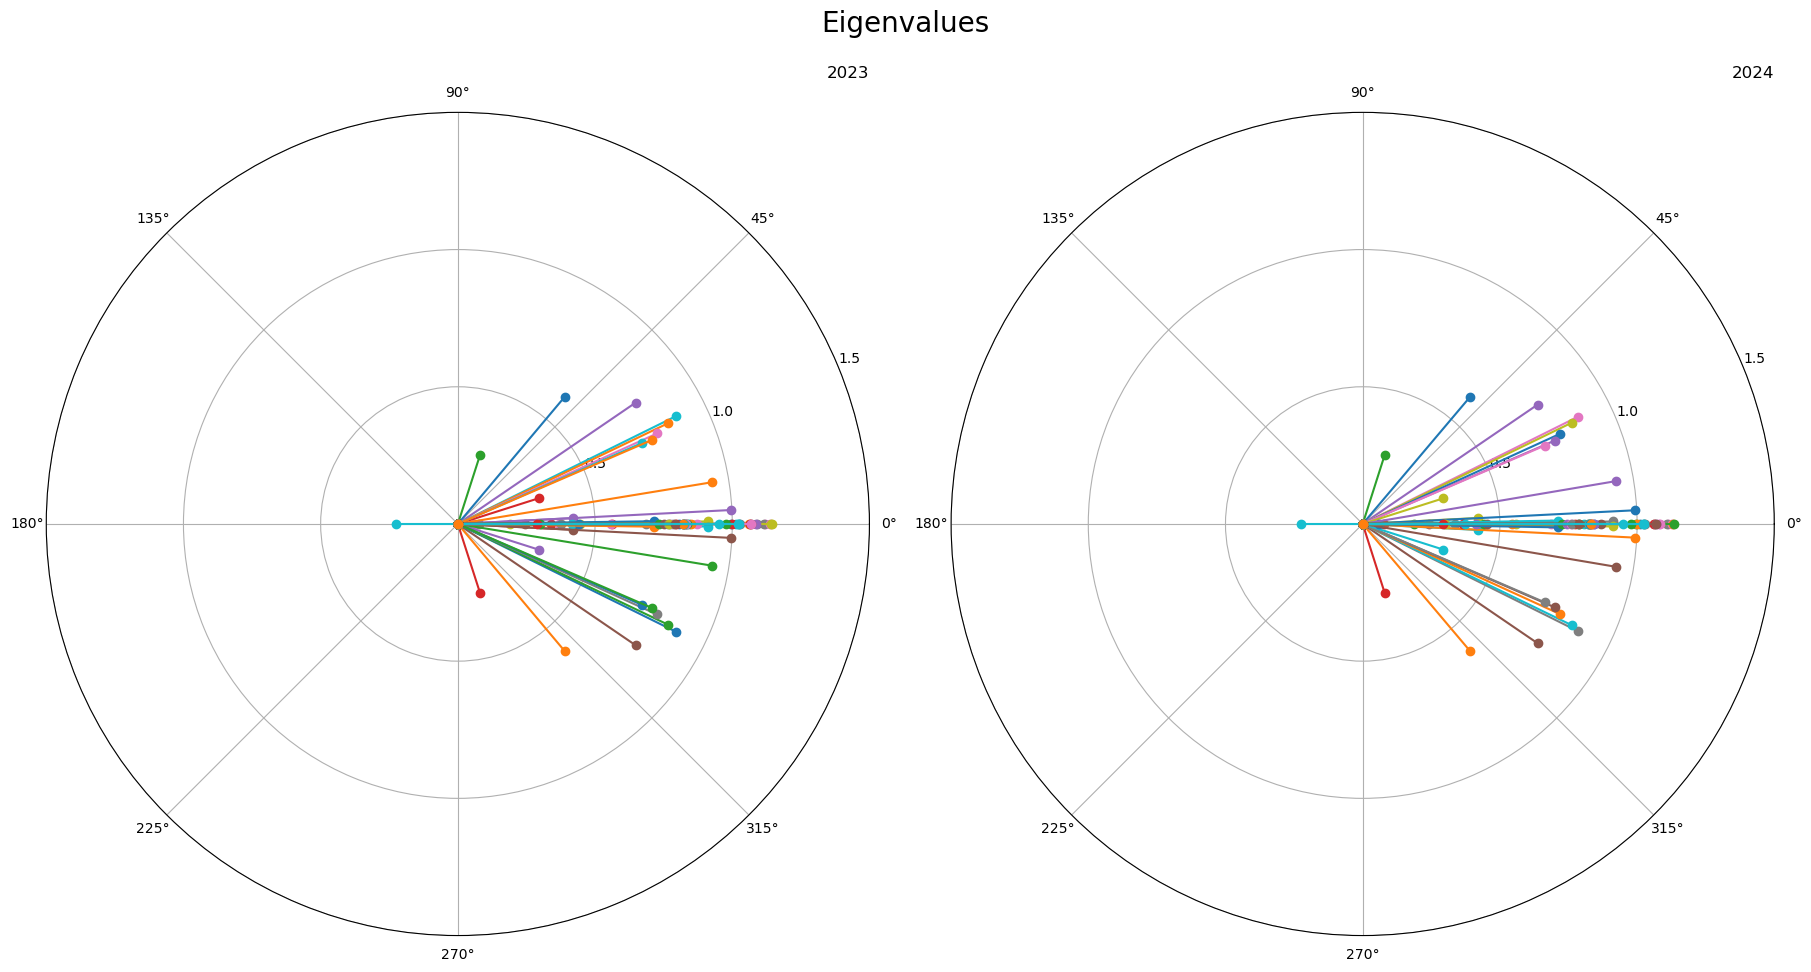

In [6]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024),silent=False,asdf=1) #  
mpak_newton.eigplot_all(eig_dic,size=(3,3));

In [7]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024),silent=False,asdf=1,
                                      dropvar = 'PAKBMFSTINTECD') #  

0 PAKBMFSTINTECD


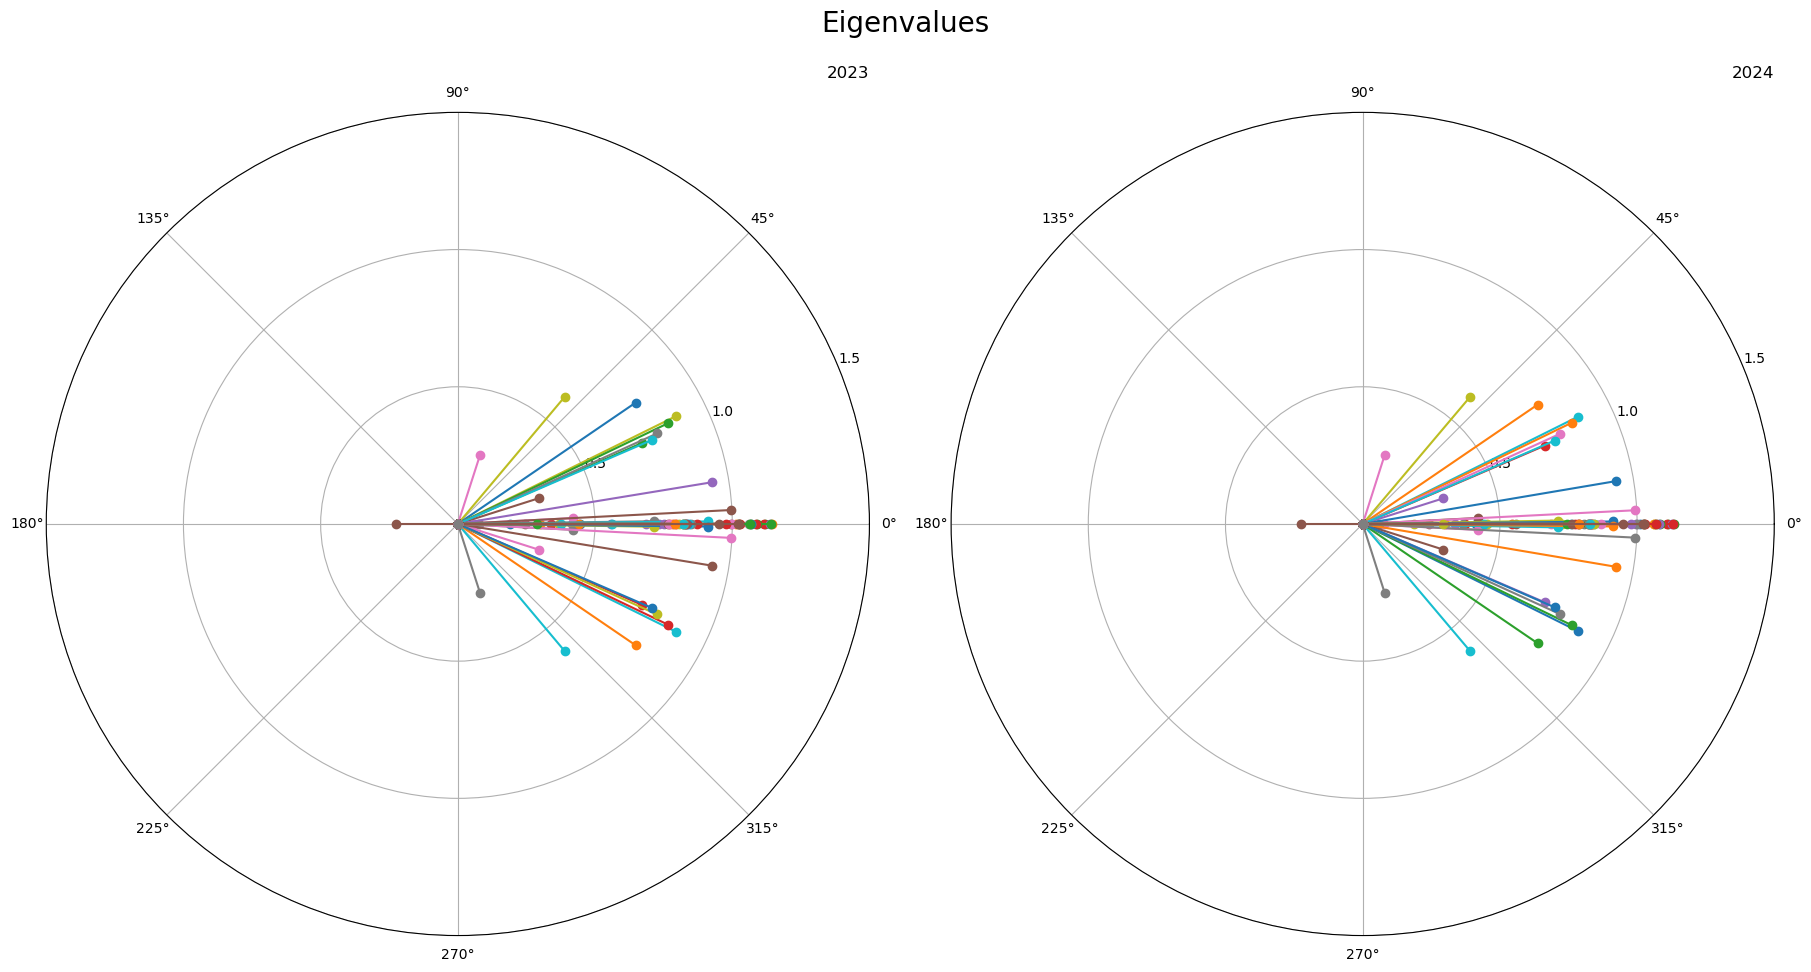

In [8]:
mpak_newton.eigplot_all(eig_dic,size=(3,3));

In [9]:
mpak_newton.comp_dic[2023].shape

(1508, 1508)

### Isolating potentially problematic eigenvalues

In the charts above it is clear that the vast majority of eigenvalues lie within the real unit circle, implying that the associated equations are dynamically stable.  However, there are several that lie outside of the unit circle.

The code below identifies and prints out those elements that are greater than one.

In [10]:
eigen = eig_dic[2023]
gt1_no_imag = sorted([(ii,i)  for ii,i in enumerate(eigen) if abs(i) >= 1 and abs(i.imag) < 0.0000000001],reverse=True)
gt1_imag    = sorted([(ii,i)  for ii,i in enumerate(eigen) if np.abs(i) >= 1 and np.abs(i.imag) >  0.00000001],reverse=True)

print('Eigenvalues with length above 1 and only real: ')
print(*[f'element {ii} length: {abs(i):.5f} ' for ii,i in gt1_no_imag],'  ',sep='\n')
print('Eigenvalues with length above 1 and imaginary: ')
print(*[f'element {ii} length: {abs(i):.5f} {i.real:.5f} {i.imag:.5f}' for ii,i in gt1_imag],sep='\n')



Eigenvalues with length above 1 and only real: 
element 1495 length: 1.02441 
element 1415 length: 1.02000 
element 1326 length: 1.00000 
element 1322 length: 1.06319 
element 1321 length: 1.01247 
element 1320 length: 1.06903 
element 1318 length: 1.06949 
element 1317 length: 1.05984 
element 1313 length: 1.08505 
element 1312 length: 1.08906 
element 1302 length: 1.13997 
element 1291 length: 1.14518 
element 533 length: 1.02737 
element 494 length: 1.13607 
element 492 length: 1.02318 
element 453 length: 1.11430 
element 452 length: 1.11792 
  
Eigenvalues with length above 1 and imaginary: 



## Jackknife resampeling
In order to try to identify interesting equation a jackknife resampeling is performed. That is the rows and columns in the companion matrix corrosponding to an equation is dropped and the eigenvalues and eigenvectors are recalculated. 

Take care this takes time (+7 minutes depending on the processor) therefor testing can be done 
by setting the parameter maxnames, which restrict the number of resampelings. 

To measure the impact the sum of the 20 largest eigenvalues are calculated. 


### Impact on the largest eigenvalue from dropping equations 
The larges eigenvalue is hardly impacted

0 CHNEXR05
1 CHNPCEXN05
2 DEUEXR05
3 DEUPCEXN05
4 FRAEXR05
5 FRAPCEXN05
6 GBREXR05
7 GBRPCEXN05
8 ITAEXR05
9 ITAPCEXN05
10 PAKBMFSTCABTCD
11 PAKBMFSTOTHRCD
12 PAKBMFSTREMTCD
13 PAKBMGSRGNFSCD
14 PAKBMGSRMRCHCD
15 PAKBMGSRNFSVCD
16 PAKBNCABFUNDCD
17 PAKBNCABFUNDCD_
18 PAKBNCABFUNDCN
19 PAKBNFSTCABTCD
20 PAKBNFSTOTHRCD
21 PAKBNFSTREMTCD
22 PAKBNGSRGNFSCD
23 PAKBNGSRMRCHCD
24 PAKBNGSRNFSVCD
25 PAKBXFSTCABTCD
26 PAKBXFSTOTHRCD
27 PAKBXFSTREMTCD
28 PAKBXGSRGNFSCD
29 PAKBXGSRMRCHCD
30 PAKBXGSRNFSVCD
31 PAKCCEMISCO2CKN
32 PAKCCEMISCO2GKN
33 PAKCCEMISCO2OKN
34 PAKCCEMISCO2TKN
35 PAKCFVOLUMECN
36 PAKCFVOLUMEKN
37 PAKCNSTINTCN
38 PAKCNSTINTKN
39 PAKCO2EM
40 PAKCRPSINTCN
41 PAKCRPSINTKN
42 PAKDISPREPCN
43 PAKDISPREPKN
44 PAKEXR05
45 PAKFINSINTCN
46 PAKFINSINTKN
47 PAKFMLBLMTWOCN
48 PAKFMLBLMTWOKN
49 PAKFMLBLPOLYXN
50 PAKFSNGINTCN
51 PAKFSNGINTKN
52 PAKFSTYINTCN
53 PAKFSTYINTKN
54 PAKGDPPCKD
55 PAKGDPPCKN
56 PAKGGBALEXGRCN
57 PAKGGBALOVRLCN
58 PAKGGBALOVRLCN_
59 PAKGGBALPRIMCN
60 PAKGGDBTDOMTCN
61

PAKNECONGOVTCN_excluded   1.1399740240112
PAKGGREVGNFSCN_excluded   1.1451770100671
PAKNYGDPMKTPKD_excluded   1.1451770100671
PAKINTREXN_excluded       1.1451770100671
PAKNVINDCNSTKN_excluded   1.1451770100671
ALL                       1.1451770100671
PAKNEIMPGSNEXN_excluded   1.1451770100671
PAKGGDBTDOMTCN_excluded   1.1451770100671
PAKLMUNRTOTLCN_excluded   1.1451770100671
PAKNECONOTHRXN_excluded   1.8497096978908
PAKNECONPRVTXN_excluded   1.8497096978911
dtype: float64

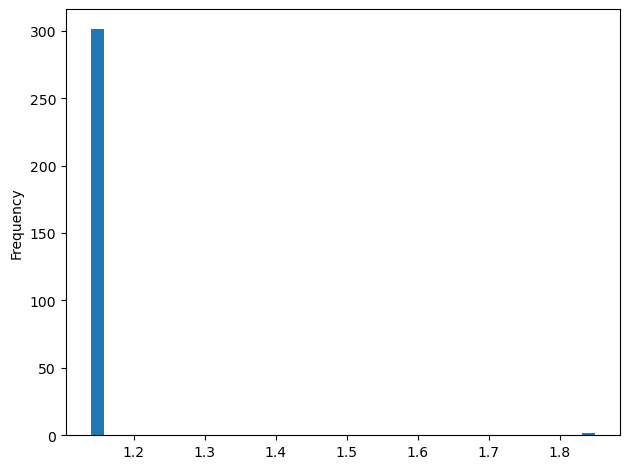

In [11]:

pd.set_option('display.float_format', '{:.13f}'.format)
xx = mpak_newton.get_eigen_jackknife_abs_select(2023,maxnames=500,largest = 1)
xx.plot(kind='hist',bins=40)
pd.concat([xx.head(),xx.loc[['ALL']],xx.tail()])

### Impact on the 20 largest eigenvalue from dropping equations 
The larges eigenvalue is hardly impacted

PAKNEGDIFGOVCN_excluded   20.9386644973438
PAKNECONGOVTCN_excluded   20.9881980068776
PAKBXGSRGNFSCD_excluded   21.0259876424832
PAKBMGSRMRCHCD_excluded   21.0441434401537
PAKBMGSRGNFSCD_excluded   21.0477632733484
ALL                       21.1864873826249
PAKGGEXPTOTLCN_excluded   21.2760498279058
PAKNEIMPGNFSKN_excluded   21.2832506490286
PAKNYGDPMKTPKN_excluded   21.3045495173896
PAKNECONOTHRXN_excluded   21.9169499831884
PAKNECONPRVTXN_excluded   22.0243365999523
dtype: float64

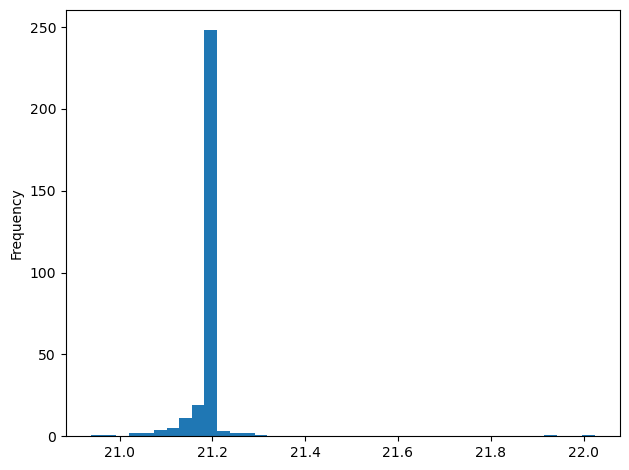

In [12]:

xx = mpak_newton.get_eigen_jackknife_abs_select(2023,maxnames=500,largest = 20)
xx.plot(kind='hist',bins=40)
pd.concat([xx.head(),xx.loc[['ALL']],xx.tail()])

### Impact on the 100 largest eigenvalue from dropping equations 

PAKNVSRVHSNGXN_excluded     61.8605709863608
PAKNVAGRFSTYXN_excluded     61.9348209437014
PAKNVSRVGOVSXN_excluded     62.0383960727239
PAKNVSRVPRVSXN_excluded     62.0903654714611
PAKNECONGOVTXN_excluded     62.0944452367167
ALL                         63.6328203244195
PAKNYGDPGAP__excluded       63.7061722396375
PAKPSTAR_excluded           63.7811919175141
PAKNEGDETTOTKN_excluded     63.8877112780250
PAKNECONPRVTXN_excluded     64.3814104447654
PAKRECOVINVESTKN_excluded   64.6328203222111
dtype: float64

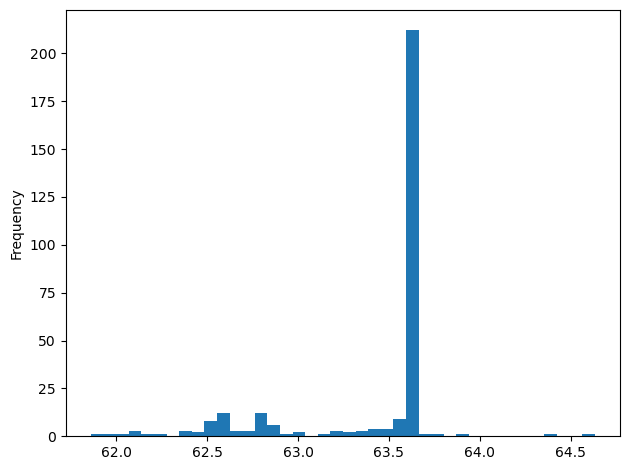

In [13]:

xx = mpak_newton.get_eigen_jackknife_abs_select(2023,maxnames=500,largest = 100)
xx.plot(kind='hist',bins=40)
pd.concat([xx.head(),xx.loc[['ALL']],xx.tail()])

## Next step, modify an equation 
Ideas please 